# Project: Investigate a Dataset - [TMDB]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This is a data analysis project for WGU C749 course.

### Dataset Description 
The data that we're going to use comes from [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). The following is a list of all the columns found in the dataset:

- id
- imdb_id
- popularity - *Measure of a movie's popularity.*
- budget
- revenue
- original_title - *Movie title. We need this is easily identify the movie*
- cast- *list of cast members delimited by '|'*
- homepage 
- director
- tagline
- keywords
- overview
- runtime - *duration of the movie*
- genres- *list of genres delimited by '|'*
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj - *the values here are adjusted for inflation*
- revenue_adj - *the values here are adjusted for inflation*



### Question(s) for Analysis

1. What are the most popular movies?
2. Which genres are most popular from?
3. What movies have the highest budgets?
4. What movies have the highest revenue?
5. What movies are most profitable?
6. Describe the sweetspot for the runtime feature.
7. Are any of the features correlated?

Let's begin.

On this cell below, we're importing the packages/libraries that we will need for the project.

In [1]:
import pandas as pd
import numpy as np

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

The cell below contains all of the program's functions.

In [2]:
def get_values(df, columns):
    """
    Take a dataframe and a list of columns and
    returns the value counts for the columns.
    """
    for column in columns:
        print(column)
        print('=====================================')
        print(df[column].value_counts(dropna=False))
        print('\n')

def show_values(df, param):
    """
    Takes a dataframe and parameters and
    calls the get_values function.
    """
    if param == 'all':
        get_values(df, df.columns)
    else:
        get_values(df, param) 

In [3]:
def calculate_toppers(df, column):
    """
    Sorts a dataframe by the supplied column name and
    lists the top 10 rows.
    """ 
    return df.sort_values(by = column, ascending = False).head(1000)

In [4]:
def pipe_counter(df, column, top_number):
    """
    Takes a dataframe, a column, and returns
    the top 10 rows of that column.
    """
    string_all = df[column].str.cat(sep = '|')
    series_all = pd.Series(string_all.split('|'))
    top5_all = series_all.value_counts(ascending = False)
    return top5_all.head(top_number)

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties



In [5]:
# read a csv file
df = pd.read_csv('../data/in/tmdb-movies.csv')

Let's get a feel for the dataset.

In [6]:
df.shape
df.info()

(10866, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

We only need certain columns. Let's create another dataframe that contains only the desired columns.

In [7]:
df1 = df[['original_title',
          'popularity',
          'cast',
          'runtime',
          'genres',
          'release_year',
          'budget_adj',
          'revenue_adj',          
        ]]

Let's see how many rows we have.

In [8]:
print('This dataframe has {} rows or records.'.format(df1.shape[0]))

This dataframe has 10866 rows or records.


Now, let's drop the duplicates.

In [9]:
df1.drop_duplicates(keep ='first', inplace=True)
print('This dataframe now has {} rows or records.'.format(df1.shape[0]))

This dataframe now has 10865 rows or records.


C:\Users\Dd\AppData\Local\Temp\ipykernel_25756\1324486049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(keep ='first', inplace=True)


Then, we will drop all the rows that has a NaN value. We will create another dataframe before then because of the large number of rows that are being dropped.

In [10]:
df2 = df1.dropna()
print('This dataframe now has {} rows or records.'.format(df2.shape[0]))

This dataframe now has 10767 rows or records.


Finally, let's convert 0 into NaNs and drop them. Let's create another data that reflects this latest change.

In [11]:
# creating a seperate list of revenue and budget column
nonzero =['budget_adj', 'revenue_adj']

#this will replace all the value from '0' to NAN in the list
df2[nonzero] = df2[nonzero].replace(0, np.NAN)

df3 = df2.dropna()
print('This dataframe now has {} rows or records.'.format(df3.shape[0]))

This dataframe now has 3850 rows or records.


C:\Users\Dd\AppData\Local\Temp\ipykernel_25756\1935603876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[nonzero] = df2[nonzero].replace(0, np.NAN)


<a id='eda'></a>
## Exploratory Data Analysis

Let's take a quick peek at the dataset.

In [12]:
df3.head()

,original_title,popularity,cast,runtime,genres,release_year,budget_adj,revenue_adj
0,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  3850 non-null   object 
 1   popularity      3850 non-null   float64
 2   cast            3850 non-null   object 
 3   runtime         3850 non-null   int64  
 4   genres          3850 non-null   object 
 5   release_year    3850 non-null   int64  
 6   budget_adj      3850 non-null   float64
 7   revenue_adj     3850 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 270.7+ KB


In [14]:
df3.describe()

,popularity,runtime,release_year,budget_adj,revenue_adj
count,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192661,109.228831,2001.260000,4.428320e+07,1.371986e+08
std,1.475527,19.924053,11.284699,4.481243e+07,2.161832e+08
min,0.001117,15.000000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463201,95.250000,1995.000000,1.314346e+07,1.841498e+07
50%,0.798343,106.000000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,119.000000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,338.000000,2015.000000,4.250000e+08,2.827124e+09


### Research Question 1 - What are the most popular movies?

To answer this question, we're going to take the top thousand records and use it as a subset for the most popular movies of all time. We're to store them in the top_popular dataframe to represent "the most popular movies of all time."

Then, we're only going to take the top five most popular movies.

In [15]:
top_popular = calculate_toppers(df3, 'popularity')
top_popular.head(5)

,original_title,popularity,cast,runtime,genres,release_year,budget_adj,revenue_adj
0,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
629,Interstellar,24.949134,Matthew McConaughey|Jessica Chastain|Anne Hathaway|Michael Caine|Casey Affleck,169,Adventure|Drama|Science Fiction,2014,1.519800e+08,5.726906e+08
630,Guardians of the Galaxy,14.311205,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Diesel|Bradley Cooper,121,Action|Science Fiction|Adventure,2014,1.565855e+08,7.122911e+08
2,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08


### Research Question 2 - Which genres are most popular?

The strategy for this question is to take the most popular movies of all time (represented by the top_popular dataframe) and count each occurance of a genre as found in the genres column.

In [16]:
pipe_counter(top_popular, 'genres', 10)

Action             387
Drama              345
Adventure          324
Thriller           321
Comedy             310
Science Fiction    207
Fantasy            178
Family             169
Crime              152
Romance            142
dtype: int64

Let's visualize the genres in a horizontal bar graph.

[Text(0.5, 1.0, 'Frequently Used Genres in the Most Popular Movies')]

Text(0.5, 0, '# of Movies in the dataset')

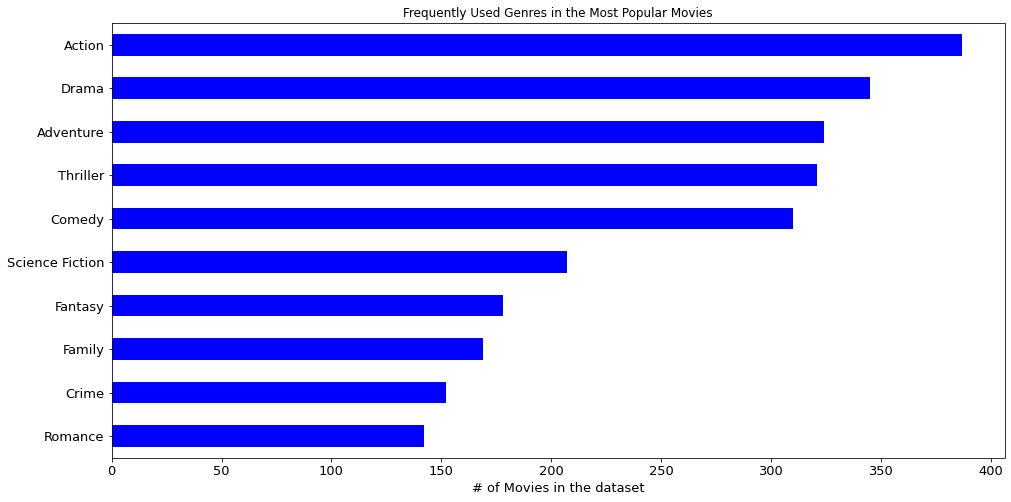

In [17]:
genres = pipe_counter(top_popular, 'genres', 10)
genres.sort_values(ascending = True, inplace = True)

lt = genres.plot.barh(color = 'blue', fontsize = 13)
lt.set(title = 'Frequently Used Genres in the Most Popular Movies')
lt.set_xlabel('# of Movies in the dataset', color = 'black', fontsize = '13')
lt.figure.set_size_inches(16, 8)
plt.show()

### Research Question 3 - Which actors and actresses are in the most popular movies?

Similarly, we're going to use the same strategy as before to determine the answer to the research question above. This time, however, we're going to count the actors and actresses in the cast column.

In [18]:
pipe_counter(top_popular, 'cast', 10)

Robert De Niro    20
Jason Statham     18
Tom Hanks         18
Bruce Willis      18
Brad Pitt         18
Johnny Depp       17
Tom Cruise        17
Cameron Diaz      16
Liam Neeson       15
Harrison Ford     15
dtype: int64

### Research Question 4 - What movies have the highest budgets?

For this question, we're going to utilize a previously used function to get define the movies that has the biggest budgets of all time.

Let's look at the top five.

In [19]:
top_budget = calculate_toppers(df3, 'budget_adj')
top_budget.head()

,original_title,popularity,cast,runtime,genres,release_year,budget_adj,revenue_adj
2244,The Warrior's Way,0.250540,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Danny Huston|Ti Lung,100,Adventure|Fantasy|Action|Western|Thriller,2010,4.250000e+08,1.108757e+07
3375,Pirates of the Caribbean: On Stranger Tides,4.955130,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian McShane|Kevin McNally,136,Adventure|Action|Fantasy,2011,3.683713e+08,9.904175e+08
7387,Pirates of the Caribbean: At World's End,4.965391,Johnny Depp|Orlando Bloom|Keira Knightley|Geoffrey Rush|Bill Nighy,169,Adventure|Fantasy|Action,2007,3.155006e+08,1.010654e+09
6570,Superman Returns,1.957331,Brandon Routh|Kevin Spacey|Kate Bosworth|James Marsden|Parker Posey,154,Adventure|Fantasy|Action|Science Fiction,2006,2.920507e+08,4.230205e+08
5231,Titanic,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates,194,Drama|Romance|Thriller,1997,2.716921e+08,2.506406e+09


### Research Question 5 - What movies have the highest revenue?

Again, we're going to same function as above to define the movies that earned the highest revenue of all time.

Let's look at the top five.

In [20]:
top_revenue = calculate_toppers(df3, 'revenue_adj')
top_revenue.head()

,original_title,popularity,cast,runtime,genres,release_year,budget_adj,revenue_adj
1386,Avatar,9.432768,Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez,162,Action|Adventure|Fantasy|Science Fiction,2009,2.408869e+08,2.827124e+09
1329,Star Wars,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter Cushing|Alec Guinness,121,Adventure|Action|Science Fiction,1977,3.957559e+07,2.789712e+09
5231,Titanic,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates,194,Drama|Romance|Thriller,1997,2.716921e+08,2.506406e+09
10594,The Exorcist,2.010733,Linda Blair|Max von Sydow|Ellen Burstyn|Jason Miller|Lee J. Cobb,122,Drama|Horror|Thriller,1973,3.928928e+07,2.167325e+09
9806,Jaws,2.563191,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorraine Gary|Murray Hamilton,124,Horror|Thriller|Adventure,1975,2.836275e+07,1.907006e+09


### Research Question 6 - What movies are most profitable?

For this question, the strategy is to insert a column that holds the difference between revenue and budget.

In [21]:
df3['profit'] = df3.revenue_adj - df3.budget_adj

C:\Users\Dd\AppData\Local\Temp\ipykernel_25756\3169502199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['profit'] = df3.revenue_adj - df3.budget_adj


In [22]:
df3.head()

,original_title,popularity,cast,runtime,genres,release_year,budget_adj,revenue_adj,profit
0,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [23]:
top_profit = calculate_toppers(df3, 'profit')
top_profit.head()

,original_title,popularity,cast,runtime,genres,release_year,budget_adj,revenue_adj,profit
1329,Star Wars,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter Cushing|Alec Guinness,121,Adventure|Action|Science Fiction,1977,3.957559e+07,2.789712e+09,2.750137e+09
1386,Avatar,9.432768,Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez,162,Action|Adventure|Fantasy|Science Fiction,2009,2.408869e+08,2.827124e+09,2.586237e+09
5231,Titanic,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates,194,Drama|Romance|Thriller,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,The Exorcist,2.010733,Linda Blair|Max von Sydow|Ellen Burstyn|Jason Miller|Lee J. Cobb,122,Drama|Horror|Thriller,1973,3.928928e+07,2.167325e+09,2.128036e+09
9806,Jaws,2.563191,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorraine Gary|Murray Hamilton,124,Horror|Thriller|Adventure,1975,2.836275e+07,1.907006e+09,1.878643e+09


### Research Question 7 - Describe the sweetspot for the runtime feature.

Using a histogram, we're going to estimate the optimal duration for a movie based on popularity.

We're just going to eyeball the values for now.

<Figure size 1600x800 with 0 Axes>

Text(0.5, 0, 'Runtime of the Movies')

Text(0, 0.5, '# of Movies in the Dataset')

Text(0.5, 1.0, 'Runtime of all the movies')

(array([ 1.,  0.,  1.,  6.,  9., 20., 39., 83., 77., 79., 78., 90., 61.,
        80., 66., 63., 53., 31., 28., 29., 26., 15., 12., 12.,  6., 10.,
         7.,  4.,  2.,  5.,  1.,  2.,  0.,  2.,  2.]),
 array([ 63.        ,  66.94285714,  70.88571429,  74.82857143,
         78.77142857,  82.71428571,  86.65714286,  90.6       ,
         94.54285714,  98.48571429, 102.42857143, 106.37142857,
        110.31428571, 114.25714286, 118.2       , 122.14285714,
        126.08571429, 130.02857143, 133.97142857, 137.91428571,
        141.85714286, 145.8       , 149.74285714, 153.68571429,
        157.62857143, 161.57142857, 165.51428571, 169.45714286,
        173.4       , 177.34285714, 181.28571429, 185.22857143,
        189.17142857, 193.11428571, 197.05714286, 201.        ]),
 <BarContainer object of 35 artists>)

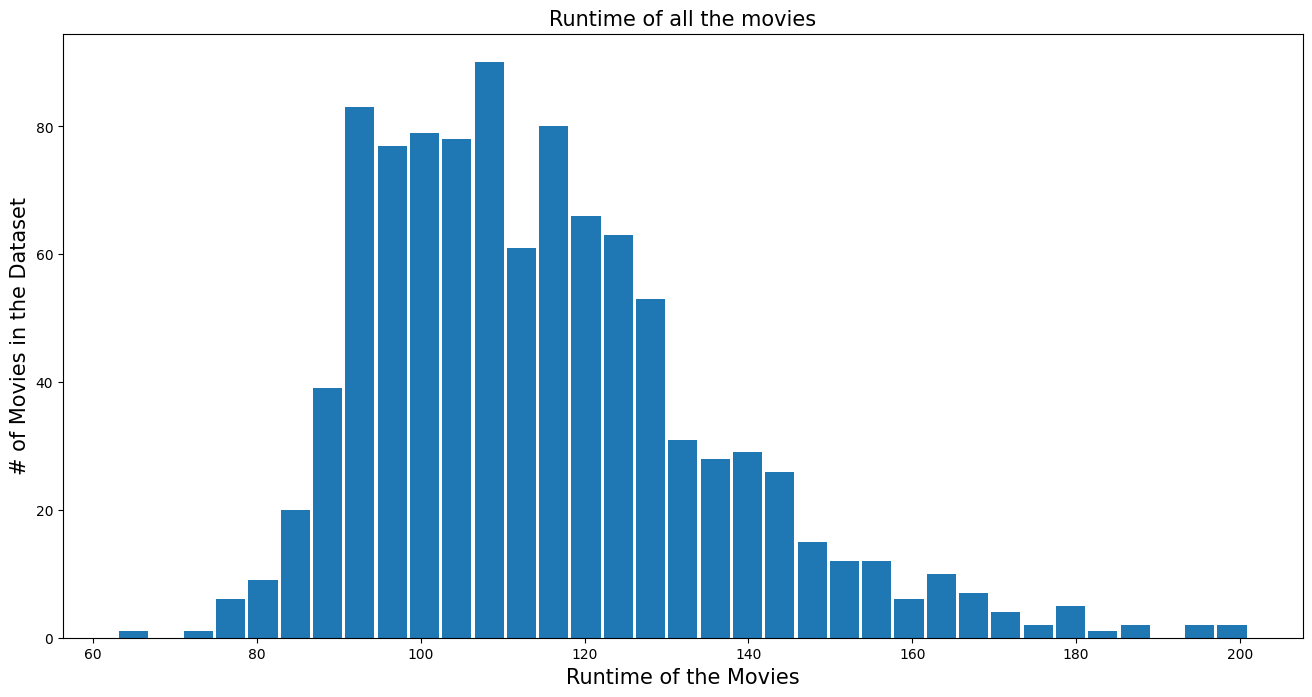

In [24]:
plt.figure(figsize=(16,8), dpi = 100)
plt.xlabel('Runtime of the Movies', fontsize = 15)
plt.ylabel('# of Movies in the Dataset', fontsize=15)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(top_popular['runtime'], rwidth = 0.9, bins =35)
plt.show()

Instead of eye-balling, let's used statistics to get a feel for runtime column's properties.

In [25]:
top_popular['runtime'].describe()

count    1000.00000
mean      114.86700
std        20.83635
min        63.00000
25%       100.00000
50%       112.00000
75%       126.00000
max       201.00000
Name: runtime, dtype: float64

Let's also use numpy to calculate the interquartile range.

In [26]:
q3, q1 = np.percentile(top_popular['runtime'], [75 ,25])
iqr = q3 - q1
print(iqr)

26.0


### Research Question 8 - Are any of the features correlated?

In [27]:
corr = round(df3.corr(),2)

<AxesSubplot:>

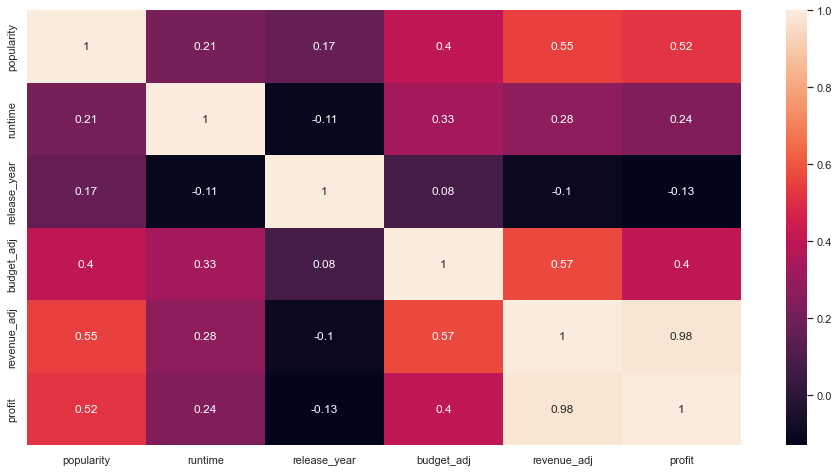

In [28]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(corr, annot=True)

The selected variables are not correlated at all.

### Research Question 9 - How is the movie industry trending?

Let's answer this question by doing a line graph. But first, we must calculate the total profit by year.

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Release Year of Movies in the data set')

Text(0, 0.5, 'Profits Earned by Movies')

Text(0.5, 1.0, 'Total Profits earned by all movies Vs Year of their release.')

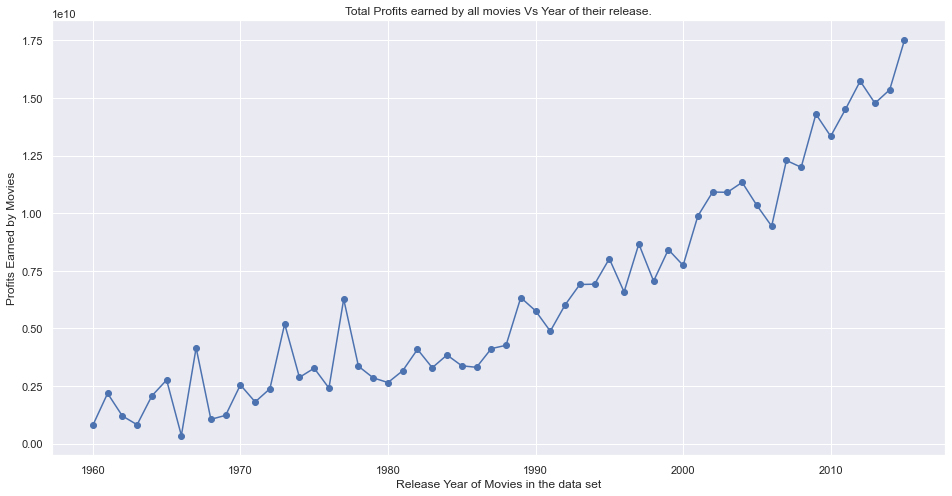

In [29]:
yearly_profit = df3.groupby('release_year')['profit'].sum()

plt.figure(figsize=(16,8))
plt.xlabel('Release Year of Movies in the data set')
plt.ylabel('Profits Earned by Movies')
plt.title('Total Profits earned by all movies Vs Year of their release.')
plt.plot(yearly_profit, marker='o')
plt.show()

It's looking good for the movie industry!

### Research Question 10 - How does budget size affect a movie's popularity.

As shown by the scatterplot, budget size does not necessarily determine a movie's popularity.

<AxesSubplot:xlabel='budget_adj', ylabel='popularity'>

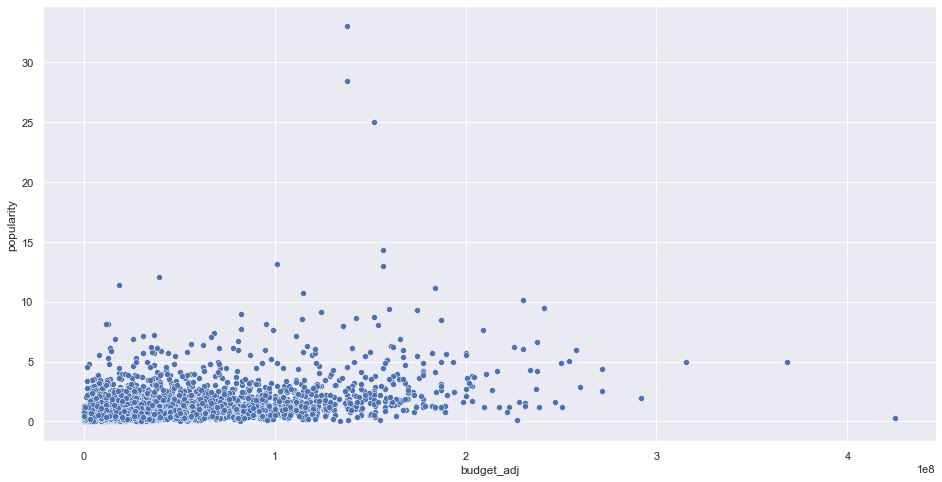

In [38]:
sns.scatterplot(data=df3, x="budget_adj", y="popularity")

<a id='conclusions'></a>
## Conclusions

Although, we did not find any strong correlation between the selected variables, this dataset was still fun to explore.

### Findings
1. Jurassic World is the most popular movie.
1. For the top ten most popular movies, action, drama, adventure, thriller, and comedy are the most popular genres.
1. Robert De Niro is the most popular actor.
1. The Warrior's Way had the biggest budget.
1. And Avatar bringing in the most money.
1. But Jurassic World took the crown for profitability.
1. The average runtime of a movie in the most popular subset is 109 minutes. And the sweet spot lies between 90 and 140 minutes.
1. No strong correlation on this dataset.
1. The movie industry is trending positively.
1. Budget size does not necessarily determine a movie's popularity

### Limitations
Some of the analysis was done on a subset that consisted of the top 1,000 most popular movies which may not be enough to conclude anything of value. Dropping all rows with NaN values significantly change the shape of the dataframe. Perhaps next time, we should impute the missing values instead of dropping them.

### Next Steps
Modifying the parameters of the subset of data could greatly improved the result of this analysis. Instead of an arbitrary hardcoded number of 1000, perhaps we could substitute it instead with a percentage or quartile.

Making a network graph of the cast would be interesting too.